# CRIPTOATAQUES

In [61]:
import sys
import os

project_root = "/workspaces/Criptoataques"

if project_root not in sys.path:
    sys.path.append(project_root)

## Análise Estatística dos Textos Originais

Antes de aplicar os algoritmos de criptografia, é fundamental entender as características estatísticas dos textos originais . Essa análise nos fornecerá uma base para comparar o impacto dos algoritmos nas propriedades dos dados.

### Métricas Estatísticas e Comparativos Iniciais

Nesta seção, serão apresentadas e comparadas as análises estatísticas para os textos de diferentes extensões..

In [62]:
import matplotlib.pyplot as plt

from crypto_io import ler_texto


from lib.ataques.cifra_de_Cesar import (
    ataque_cesar,
    cifrar,
)

from lib.ataques.analise_de_frequencia import (
    contar_frequencias,
    frequencia_relativa,
)

from lib.ataques.cifra_de_vigenere.vigenere import VigenereCifra

encriptar_decriptar = VigenereCifra.encriptar_decriptar


from lib.ataques.rsa_franklin_reiter import (
    ataque_franklin_reiter,
    gerador_caso_relacionado_linear,
)   

from lib.estatisticas import (
    medir_tempo,
    expansao_tamanho,
    calcular_avalanche,
    comparar_algoritmos,
    indice_coincidencia,
    tamanho_bytes,
)


base_path = "/workspaces/Criptoataques/examples/textos_base"
paths = {
    "Curto": f"{base_path}/curto.txt",
    "Médio": f"{base_path}/medio.txt",
    # "Longo": f"{base_path}/longo.txt",
}

textos = {nome: ler_texto(caminho) for nome, caminho in paths.items()}

Segue bla bla

In [63]:
def plot_freq(texto, titulo):
    freqs = frequencia_relativa(contar_frequencias(texto))

    letras = list(freqs.keys())
    valores = list(freqs.values())

    plt.figure(figsize=(10, 4))
    plt.bar(letras, valores)
    plt.title(titulo)
    plt.xlabel("Caracteres")
    plt.ylabel("Frequência relativa")
    plt.show()


def plot_comparar_freq(textos_dict, titulo="Comparação de Frequências Relativas"):
    plt.figure(figsize=(12, 5))

    # Pegamos todas as letras possíveis
    todas_letras = sorted(
        set().union(*[contar_frequencias(t).keys() for t in textos_dict.values()])
    )

    for nome, texto in textos_dict.items():
        freq = frequencia_relativa(contar_frequencias(texto))

        valores = [freq.get(l, 0) for l in todas_letras]

        plt.plot(todas_letras, valores, label=nome)

    plt.title(titulo)
    plt.xlabel("Caracteres")
    plt.ylabel("Frequência relativa")
    plt.legend()
    plt.show()


def tabela_metricas(textos_dict):
    tabela = {}

    for nome, texto in textos_dict.items():
        freq_abs = contar_frequencias(texto)

        tabela[nome] = {
            "Índice de Coincidência": indice_coincidencia(texto),
            "Total de caracteres": len(texto),
            "Caracteres distintos": len(freq_abs)
        }

    return tabela

Segue uma tabela com as métricas dos textos:

In [64]:
metricas = tabela_metricas(textos)
metricas

{'Curto': {'Índice de Coincidência': 0.04408924512377609,
  'Total de caracteres': 622,
  'Caracteres distintos': 20},
 'Médio': {'Índice de Coincidência': 0.0430645151891284,
  'Total de caracteres': 829,
  'Caracteres distintos': 23}}

bla bla bla

Segue os gráficos individuais de frequência:

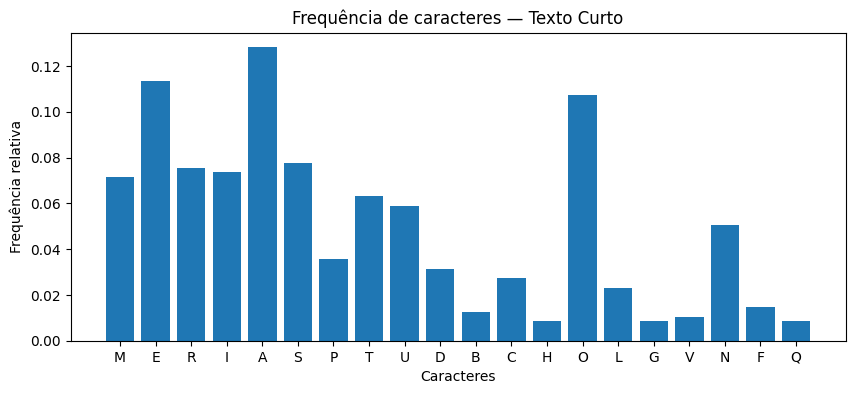

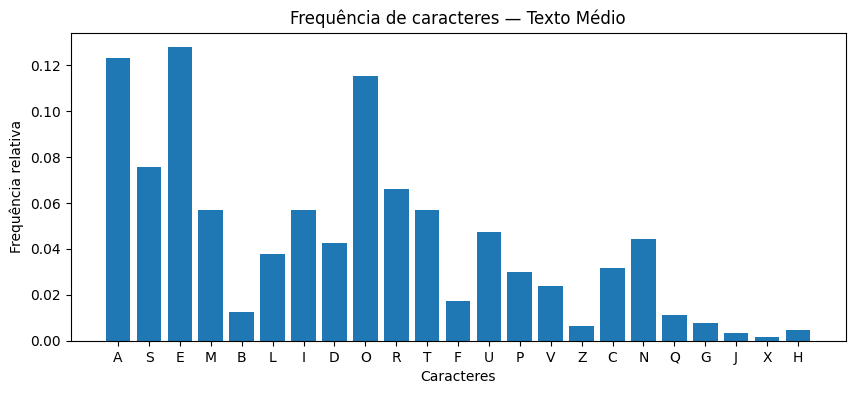

In [65]:
for nome, texto in textos.items():
    plot_freq(texto, f"Frequência de caracteres — Texto {nome}")

bla bla bla

Segue Gráfico comparativo dos três textos

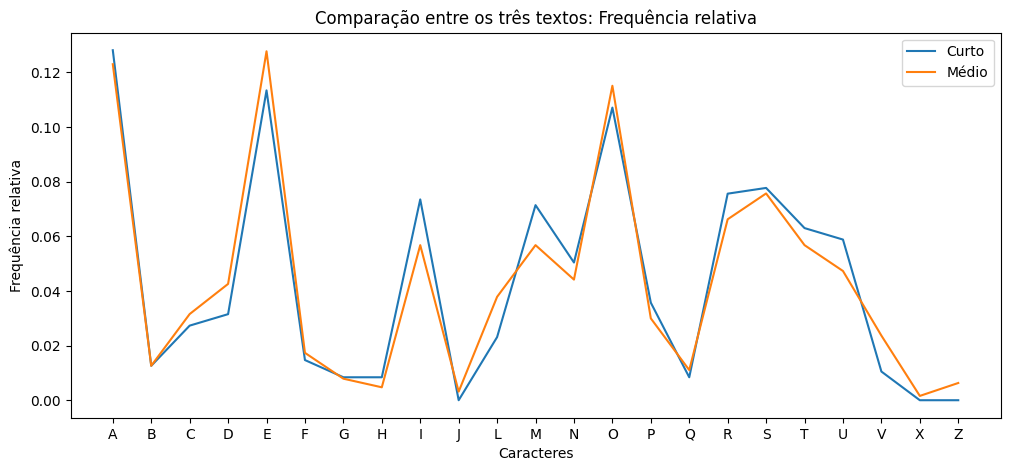

In [66]:
plot_comparar_freq(textos, "Comparação entre os três textos: Frequência relativa")

bla bla bla

## Análise de Desempenho dos Algoritmos Criptográficos

Para avaliar a eficácia e segurança dos algoritmos de criptografia, vamos analisar diversas métricas após a aplicação de cada algoritmo aos textos originais. Isso nos permitirá comparar o desempenho e as características dos textos cifrados e decifrados.

### Métricas de Avaliação Detalhadas e Comparativos

#### Tempo de Criptografia/Descriptografia

Esta métrica mede o tempo necessário para um algoritmo criptografar e descriptografar um determinado texto. É crucial para entender a eficiência operacional de cada algoritmo, especialmente em cenários de alta demanda ou com grandes volumes de dados. Um algoritmo mais rápido pode ser preferível, desde que não comprometa a segurança.

*   **Gráficos Comparativos:**

In [69]:
def cesar_wrapper(texto):
    return cifrar(texto, chave=3)

def vigenere_cifrar(texto):
    return encriptar_decriptar(texto, chave="criptografia", opcao="cifrar") 

def vigenere_decifrar(texto_cifrado):
    return encriptar_decriptar(texto_cifrado, chave="criptografia", opcao="decifrar")


# Variável global para armazenar o 'caso' RSA por texto.
# Chave: hash do texto original | Valor: o dicionário 'caso' completo.
_rsa_case_cache = {}
MAX_RSA_BYTES = 250


def rsa_cifrar(texto):
    global _rsa_case_cache
    texto_limitado = texto[:MAX_RSA_BYTES]
    
    if not texto_limitado:
        raise ValueError("Texto de entrada vazio após limitação de tamanho.")
        
    chave_cache = hash(texto_limitado)
    
    if chave_cache not in _rsa_case_cache:
        caso = gerador_caso_relacionado_linear(texto1=texto_limitado, bits=2048)
        _rsa_case_cache[chave_cache] = caso
        
    caso = _rsa_case_cache[chave_cache]

    return str(caso["c1"])


def rsa_decifrar(texto_cifrado):
    global _rsa_case_cache
    
    if not _rsa_case_cache:
        raise RuntimeError("Cache RSA vazio. Chame rsa_cifrar antes de rsa_decifrar.")
        
    caso = list(_rsa_case_cache.values())[0] 
    
    ataque_franklin_reiter(
        caso["c1"], caso["c2"], caso["e"], caso["n"], caso["a"], caso["b"], caso.get("nbytes")
    )
    return "Dummy" # mantém a interface de retorno

# def rsa_cifrar(texto):
#     # Limita o texto de entrada para que ele caiba no módulo N
#     texto_limitado = texto[:250]
    
#     if not texto_limitado:
#         raise ValueError("Texto de entrada vazio após limitação de tamanho.")
        
#     caso = gerador_caso_relacionado_linear(texto1=texto_limitado, bits=2048)
    
#     # O ciphertext RSA é um inteiro, então transformamos em string
#     return str(caso["c1"])

# def rsa_decifrar(texto_cifrado):
#     caso = gerador_caso_relacionado_linear(texto1="A" * 250, bits=2048) 
    
#     ataque_franklin_reiter(
#          caso["c1"], caso["c2"], caso["e"], caso["n"], caso["a"], caso["b"], caso.get("nbytes")
#     )
#     return "Dummy"

algoritmos_dec = {
    "César (dec)": lambda t: cifrar(t, chave=3),
    "Vigenère (dec)": lambda t: encriptar_decriptar(t, chave="criptografia"),
    "RSA (dec)": rsa_cifrar
}

algoritmos_combinados = {
    "César": {
        "cifrar": cesar_wrapper,
        "decifrar": algoritmos_dec["César (dec)"],
    },
    #   "Vigenere": {
    #     "cifrar": vigenere_cifrar,
    #     "decifrar": vigenere_decifrar
    # },
    "RSA": {
        "cifrar": rsa_cifrar,
        "decifrar": rsa_decifrar,
    },
}

comparacao = comparar_algoritmos(textos, algoritmos_combinados)

KeyboardInterrupt: 

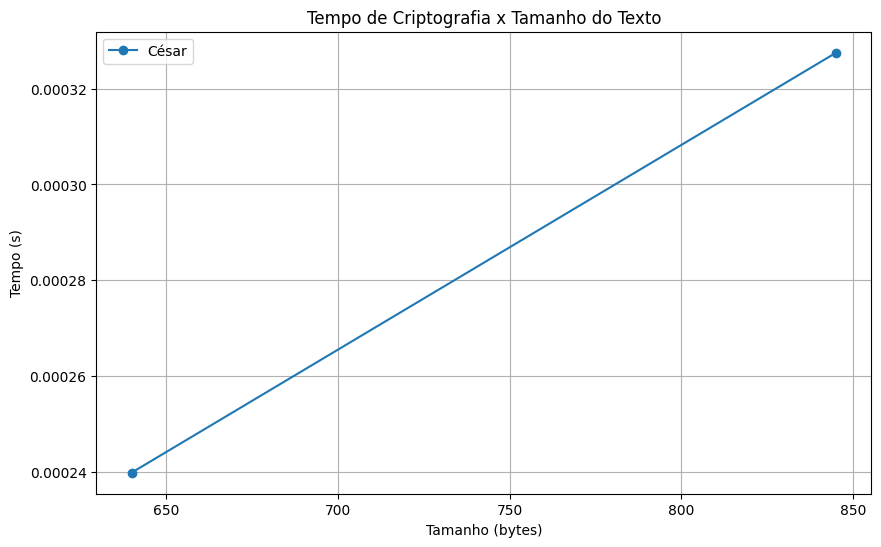

In [ ]:
def plot_tempo_cifra(comparacao):
    """
    Gera o gráfico de Tempo de Criptografia x Tamanho do Texto.
    
    Args:
        comparacao (dict): Dicionário aninhado de resultados.
    """
    plt.figure(figsize=(10, 6))
    
    for nome_alg, resultados_alg in comparacao.items():
        tamanhos = []
        tempos_cifra = []
        
        for dados_texto in resultados_alg.values():
            tamanhos.append(dados_texto["tamanho"])
            tempos_cifra.append(dados_texto["tempo_cifra"])
            
        plt.plot(tamanhos, tempos_cifra, marker="o", label=nome_alg)

    plt.title("Tempo de Criptografia x Tamanho do Texto")
    plt.xlabel("Tamanho (bytes)")
    plt.ylabel("Tempo (s)")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_tempo_cifra(comparacao)


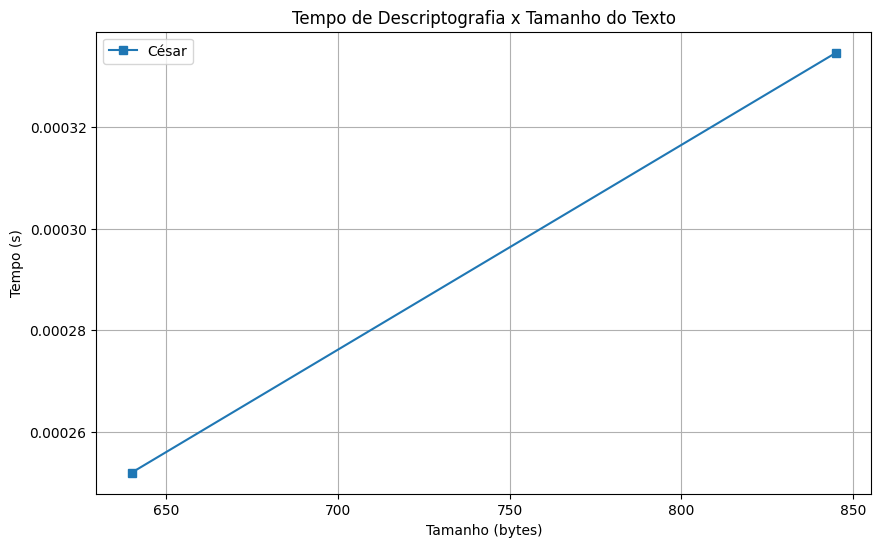

In [ ]:
def plot_tempo_decifra(comparacao):
    """
    Gera o gráfico de Tempo de Descriptografia x Tamanho do Texto.
    
    Args:
        comparacao (dict): Dicionário aninhado de resultados.
    """
    plt.figure(figsize=(10, 6))
    
    for nome_alg, resultados_alg in comparacao.items():
        tamanhos = []
        tempos_decifra = []
        
        # Itera sobre os resultados de cada texto
        for dados_texto in resultados_alg.values():
            tamanhos.append(dados_texto["tamanho"])
            tempos_decifra.append(dados_texto["tempo_decifra"])

        plt.plot(tamanhos, tempos_decifra, marker="s", label=nome_alg)

    plt.title("Tempo de Descriptografia x Tamanho do Texto")
    plt.xlabel("Tamanho (bytes)")
    plt.ylabel("Tempo (s)")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_tempo_decifra(comparacao)

*   **Análise Gráfica e de Resultados:**

    [Espaço para a análise textual das observações sobre o tempo de execução, comparando os algoritmos e o impacto do tamanho do texto.]

#### IC


*   **Teoria:** O Índice de Coincidência é uma ferramenta estatística utilizada para medir a probabilidade de que dois caracteres escolhidos aleatoriamente de um texto sejam iguais. Para textos em linguagem natural, o IC é relativamente alto. Após a criptografia, espera-se que o IC de um texto cifrado seja significativamente menor e próximo ao de um texto aleatório, indicando que a estrutura da linguagem original foi mascarada.

*   **Gráficos Comparativos:**

bla bla

#### Expansão de Tamanho

*   **Teoria:** Esta métrica avalia o quanto o tamanho do texto cifrado se expande em relação ao texto original. Alguns algoritmos criptográficos adicionam bytes extras (por exemplo, devido ao preenchimento - padding) ao texto original, resultando em um texto cifrado maior. A expansão excessiva pode ser um fator a considerar em aplicações com restrições de armazenamento ou largura de banda.

*   **Gráficos Comparativos:**

In [ ]:
def plot_comparativo_expansao(comparacao):
    plt.figure(figsize=(8,5))
    for alg, dados in comparacao.items():
        plt.plot(dados["tamanho"], dados["expansao"], marker="o", label=alg)

    plt.title("Expansão de Tamanho x Tamanho do Texto")
    plt.xlabel("Tamanho (bytes)")
    plt.ylabel("Expansão (%)")
    plt.legend()
    plt.grid(True)
    plt.show()


bla bla

#### Efeito Avalanche

*   **Teoria:** O efeito avalanche mede a propriedade de um algoritmo criptográfico onde uma pequena alteração no texto de entrada (ou na chave) resulta em uma grande alteração no texto de saída. Um bom efeito avalanche é essencial para a segurança, pois garante que mesmo pequenas modificações sejam propagadas extensivamente, dificultando a inferência de informações sobre o texto original ou a chave a partir do texto cifrado.

*   **Gráficos Comparativos:**

In [ ]:
def plot_avalanche(pares, label="Avalanche"):
    valores = [calcular_avalanche(orig, mod) for orig, mod in pares]  # (texto, texto_modificado)

    plt.figure(figsize=(8,5))
    plt.plot(range(len(pares)), valores, marker="o")
    plt.xlabel("Amostra")
    plt.ylabel("Diferença (%)")
    plt.title(label)
    plt.grid(True)
    plt.show()

# pares = [(texto, texto_modificado), ...]
# plot_avalanche(pares)

### Visualização: Textos Cifrados e Decifrados

## Cifra de César

## Análise de Frequência


## Cifra de Vigénere

In [ ]:
vigenere = VigenereCifra()

In [ ]:
texto_original = open("examples/textos_base/longo.txt", encoding="utf-8").read()
chave_encr = "raphaella"
texto_cifrado = vigenere.encriptar_decriptar(texto_original, chave_encr, "ENCRIPTAR")
print(texto_cifrado)

AttributeError: 'VigenereCifra' object has no attribute '_limpar_texto'

In [ ]:
vigenere.tamanho_chave(texto_cifrado)

In [ ]:
tamanho_chave = 9
chave_encontrada = vigenere.quebra_chave(texto_cifrado,tamanho_chave, 'pt')
print(chave_encontrada)

In [ ]:
texto_decriptado = vigenere.encriptar_decriptar(texto_cifrado, chave_encontrada,"DECRIPTAR")
print(texto_decriptado)

## Criptografia RSA